# import libraries

In [2]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Matplotlib is building the font cache; this may take a moment.


# import dataframes

In [14]:
#Identify path 
path= '../04 Analysis/'

In [4]:
# import df_ords_prods_merge pickle
ords_prods_merge=pd.read_pickle(os.path.join(path, 'Prepared Data', 'ords_prods_merge.pkl'))

# Bar Charts

<Axes: xlabel='orders_day_of_week'>

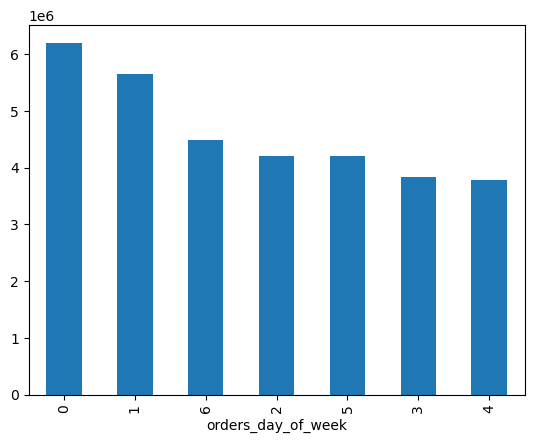

In [6]:
#create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

### histograms

<Axes: ylabel='Frequency'>

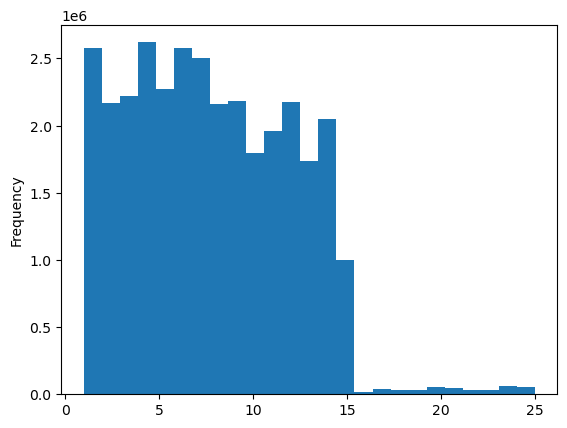

In [10]:
ords_prods_merge['prices'].plot.hist(bins=25)

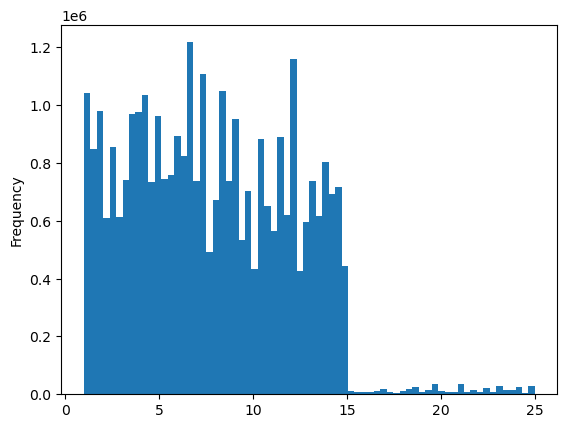

In [11]:
#assigning variable to histogram
hist_2=ords_prods_merge['prices'].plot.hist(bins=70)

In [15]:
#exporting hist_2
hist_2.figure.savefig(os.path.join(path, 'Visualizations','bar_orders_dow.png'))

# Scatterplot

In [8]:
#outlier check
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,frequent_cust,frequent_flag,Median_days_between


In [ ]:
# gettig rid of outlier 
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

# Line charts

In [17]:
#creating my two sample with a 70/30 ratio. holding true or false values 
np.random.seed(4)
dev= np.random.rand(len(ords_prods_merge))<=0.7

In [20]:
#store 70% of the sample in the dataframe big
big= ords_prods_merge[dev]

In [21]:
#store 30% of the sample in the dataframe small
small=ords_prods_merge[~dev]

In [22]:
#checking our work and if the two samples equal the orginal dataframe
len(ords_prods_merge)

32404859

In [23]:
len(big) + len(small)

32404859

In [19]:
#random numbers greater than or less than 0.7
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [18]:
dev

array([False,  True, False, ...,  True,  True,  True], shape=(32404859,))

In [24]:
# reducing sample to only the columns we will use, price, orders days of week
df_2=small[['orders_day_of_week','prices']]

In [25]:
df_2.head()

,orders_day_of_week,prices
92376,1,9.0
7157236,1,4.4
16105131,1,8.6
92375,1,9.0
29712647,1,13.4


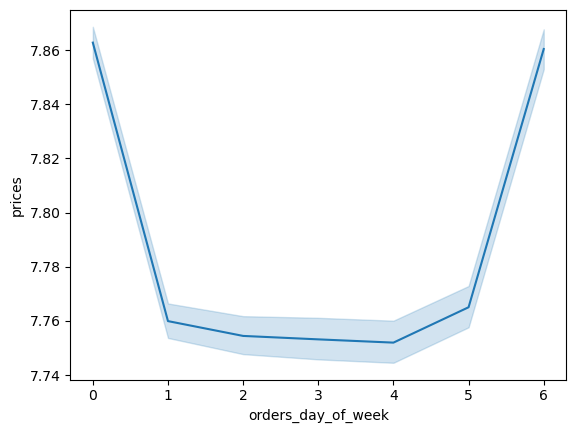

In [27]:
# making the line chart
line=sns.lineplot(data=df_2,x='orders_day_of_week',y='prices')